## Final Project Submission

Please fill out:
* Student name: **Theresa Dolan**
* Student pace: self paced / part time / **full time**
* Scheduled project review date/time: **Friday, June 24**
* Instructor name: **Joseph Mata**
* Blog post URL: **https://medium.com/me/stories/public**


# Business Case

#### Fill in information about: 
- Stakeholder
- Situation
- Problem to solve

# Approach / Method of Analysis

#### Data Analysis
- Types of models and tools to use
- Source data
 - King County Housing Data
 - Washington State Public School Data
      - King and surrounding county school districts by zip code - https://elementaryschools.org/data-request.html
      - King and surrounding county graduation rate by school disctrict - https://www.k12.wa.us/data-reporting
 - King County Housing Agency 
      - Subsidy Payment Tiers by Zip Code - https://www.kcha.org/documents/63.pdf
      - Broadband Survey - https://www.arcgis.com/apps/dashboards/4bcf7c77ecac475eb467e9df0028d05b
      - Impact of Broadband on housing prices - Study: https://realtorparty.realtor/community-outreach/rural-outreach-initiative/news-resources/impact-of-broadband
- Predictive variable(s)

# Import Tools

In [572]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from IPython.display import display, HTML
from sklearn.preprocessing import Normalizer

# Import Data

In [573]:
df_housing = pd.read_csv('Data/kc_house_data.csv')
df_grade = pd.read_csv('Data/Report_Card_Graduation_201415.csv')
df_address = pd.read_csv('Data/Washington_Education_District.csv')
df_expanded_address = pd.read_csv('Data/public_school_report.csv')


Housing Data Column Descriptions

##### Column Names and Descriptions for King County Data Set
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors


001	Seattle
210	Federal Way
216	Enumclaw
400	Mercer Island
401	Highline
402	Vashon Island
403	Renton
404	Skykomish
405	Bellevue
406	Tukwila
407	Riverview
408	Auburn
409	Tahoma
410	Snoqualmie Valley
411	Issaquah
412	Shoreline
414	Lake Washington
415	Kent
417	Northshore
888	Fife

## Housing Data

In [574]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [575]:
df_housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [576]:
df_housing.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [577]:
print(df_housing.nunique())

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64


## King County School Graduation Rates

In [578]:
df_grade.head()

,SchoolYear,OrganizationLevel,County,ESDName,ESDOrganizationId,DistrictCode,DistrictName,DistrictOrganizationId,SchoolCode,SchoolName,SchoolOrganizationId,StudentGroupType,StudentGroup,Suppression,Cohort,BegginingGrade9,TransferIn,Year1Dropout,Year2Dropout,Year3Dropout,Year4Dropout,Year5Dropout,Year6Dropout,Year7Dropout,TransferOut,FinalCohort,Graduate,Continuing,Dropout,GraduationRate,DataAsOf
0,2015,County,Franklin,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,504,Section 504,No Suppression,Four Year,23.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,0.0,23.0,18.0,3.0,2.0,0.7826,12/14/2020 12:00:00 AM
1,2015,County,Grant,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,504,Section 504,No Suppression,Four Year,50.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN,3.0,47.0,32.0,11.0,4.0,0.6809,12/14/2020 12:00:00 AM
2,2015,State,Multiple,State Total,NaN,NaN,State Total,NaN,NaN,State Total,NaN,504,Non Section 504,No Suppression,Six year,75891.0,14653.0,838.0,1247.0,2387.0,4522.0,3318.0,1770.0,NaN,12392.0,78148.0,62948.0,1118.0,14082.0,0.8055,12/14/2020 12:00:00 AM
3,2015,State,Multiple,State Total,NaN,NaN,State Total,NaN,NaN,State Total,NaN,504,Non Section 504,No Suppression,Seven year,77698.0,17555.0,2371.0,1895.0,3204.0,5217.0,3066.0,1453.0,743.0,12803.0,82444.0,64418.0,77.0,17949.0,0.7814,12/14/2020 12:00:00 AM
4,2015,State,Multiple,State Total,NaN,NaN,State Total,NaN,NaN,State Total,NaN,504,Non Section 504,No Suppression,Four Year,75735.0,12151.0,472.0,961.0,2052.0,5593.0,NaN,NaN,NaN,11809.0,76077.0,59483.0,7516.0,9078.0,0.7819,12/14/2020 12:00:00 AM


In [579]:
df_grade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78246 entries, 0 to 78245
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SchoolYear              78246 non-null  int64  
 1   OrganizationLevel       78246 non-null  object 
 2   County                  78246 non-null  object 
 3   ESDName                 73511 non-null  object 
 4   ESDOrganizationId       76918 non-null  float64
 5   DistrictCode            73805 non-null  float64
 6   DistrictName            74745 non-null  object 
 7   DistrictOrganizationId  77306 non-null  float64
 8   SchoolCode              53760 non-null  float64
 9   SchoolName              74745 non-null  object 
 10  SchoolOrganizationId    57261 non-null  float64
 11  StudentGroupType        78246 non-null  object 
 12  StudentGroup            78246 non-null  object 
 13  Suppression             78246 non-null  object 
 14  Cohort                  78246 non-null

In [580]:
df_grade.describe()

,SchoolYear,ESDOrganizationId,DistrictCode,DistrictOrganizationId,SchoolCode,SchoolOrganizationId,BegginingGrade9,TransferIn,Year1Dropout,Year2Dropout,Year3Dropout,Year4Dropout,Year5Dropout,Year6Dropout,Year7Dropout,TransferOut,FinalCohort,Graduate,Continuing,Dropout,GraduationRate
count,78246.0,76918.000000,73805.000000,77306.000000,53760.000000,57261.000000,33136.000000,30980.000000,14450.000000,19067.000000,23856.000000,27070.000000,18398.000000,8611.000000,2770.000000,34179.000000,34179.000000,34179.000000,34179.000000,34179.000000,39333.000000
mean,2015.0,95453.365298,22464.217790,95661.753861,3339.223251,96266.038455,411.360665,79.175533,12.402907,11.500656,17.143905,31.563982,23.171377,15.246545,10.483032,62.158314,408.402499,328.344129,14.270605,65.787764,0.739437
std,0.0,20844.515694,10357.188099,20839.904666,1222.880840,24610.778507,2785.643160,521.686721,70.231152,61.273257,100.253063,193.879121,138.116258,80.458465,46.764757,430.705763,2805.088941,2257.510486,143.475156,470.462900,0.207091
min,2015.0,0.000000,1109.000000,0.000000,1500.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016400
25%,2015.0,100003.000000,17001.000000,100075.000000,2283.000000,101123.000000,21.000000,5.000000,1.000000,1.000000,2.000000,3.000000,2.000000,1.000000,1.000000,3.000000,20.000000,11.000000,0.000000,3.000000,0.666700
50%,2015.0,100006.000000,22009.000000,100150.000000,3236.000000,102149.000000,69.000000,15.000000,2.000000,2.000000,3.000000,6.000000,4.000000,3.000000,2.000000,10.000000,66.000000,46.000000,1.000000,10.000000,0.811300
75%,2015.0,100007.000000,31201.000000,100231.000000,4295.000000,103194.000000,218.250000,39.000000,6.000000,5.000000,8.000000,15.000000,11.000000,7.000000,5.000000,31.000000,216.000000,181.000000,4.000000,28.000000,0.882400
max,2015.0,100009.000000,39209.000000,105800.000000,5957.000000,105812.000000,80568.000000,17865.000000,2371.000000,1917.000000,3269.000000,5894.000000,3863.000000,1854.000000,780.000000,13053.000000,85374.000000,66843.000000,8048.000000,18452.000000,0.990000


## Zipcode Data by School District

In [581]:
df_address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ESDCode            320 non-null    object
 1   ESDName            320 non-null    object
 2   DistrictCode       320 non-null    int64 
 3   DistrictName       320 non-null    object
 4   AddressLine1       320 non-null    object
 5   AddressLine2       9 non-null      object
 6   City               320 non-null    object
 7   State              320 non-null    object
 8   Zipcode            320 non-null    object
 9   AdministratorName  320 non-null    object
 10  Phone              310 non-null    object
 11  Email              310 non-null    object
dtypes: int64(1), object(11)
memory usage: 30.1+ KB


In [582]:
df_address.head()

,ESDCode,ESDName,DistrictCode,DistrictName,AddressLine1,AddressLine2,City,State,Zipcode,AdministratorName,Phone,Email
0,34801,Capital Region ESD 113,14005,Aberdeen School District,216 N G ST,NaN,ABERDEEN,Washington,98520-5297,Alicia Henderson,(360)538-2002,ahenderson@asd5.org
1,34801,Capital Region ESD 113,21226,Adna School District,PO BOX 118,NaN,ADNA,Washington,98522-0118,James Forrest,(360)748-0362,forrestj@adnaschools.org
2,32801,Educational Service District 101,22017,Almira School District,PO BOX 217,NaN,ALMIRA,Washington,99103-0217,Shauna L Schmerer,(509)639-2414,sschmerer@almirasd.org
3,29801,Northwest Educational Service District 189,29103,Anacortes School District,2200 M AVE,NaN,ANACORTES,Washington,98221-3794,Mark Wenzel,(360)503-1211,Mwenzel@asd103.org
4,29801,Northwest Educational Service District 189,31016,Arlington School District,315 N FRENCH AVE,NaN,ARLINGTON,Washington,98223-1317,Chrys Sweeting,(360)618-6200,csweeting@asd.wednet.edu


In [583]:
df_expanded_address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122 entries, 0 to 1121
Data columns (total 87 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Nces Id                        1122 non-null   int64  
 1   School Level                   1122 non-null   object 
 2   School District                1122 non-null   object 
 3   School Name                    1122 non-null   object 
 4   School County                  1122 non-null   object 
 5   Phone                          1122 non-null   object 
 6   Address                        1122 non-null   object 
 7   City                           1122 non-null   object 
 8   State                          1122 non-null   object 
 9   Zip                            1122 non-null   int64  
 10  School Type                    1122 non-null   object 
 11  State Fips                     1122 non-null   int64  
 12  Low Grade                      1122 non-null   o

In [584]:
df_expanded_address.head()

,Nces Id,School Level,School District,School Name,School County,Phone,Address,City,State,Zip,School Type,State Fips,Low Grade,High Grade,Students Ug,Students Prek,Students K,Students 1,Students 2,Students 3,Students 4,Students 5,Students 6,Students 7,Students 8,Students 9,Students 10,Students 11,Students 12,Operational Status,Latitude,Longitude,State School Id,State District Id,Total Male,Total Female,Total American Indian Alaskan,Total Asian,Total Black,Total Hispanic,Total White,Free Lunch Eligible,Reduce Price Lunch Eligible,Free & Reduced Lunch Total,Student Teacher Ratio,Full Time Equivalent Teachers,Local Education Agency Id,Local School Id,Mailing Address,Mailing City,Mailing State,Mailing Zip,Mailing Zip4,Zip4,Union Identification Number,Urban Locale Code,Ansi Fips County Number,District Code 113,District Code 112,Bureau Of Indian,Offered Ug,Offered Prek,Offered K,Offered 1,Offered 2,Offered 3,Offered 4,Offered 5,Offered 6,Offered 7,Offered 8,Offered 9,Offered 10,Offered 11,Offered 12,Title 1 Status,Title 1 Eligible,Title 1 School Wide,Magnet School,Charter School,Shared Time School,Count Free Lunch,Count Reduced Lunch,Total Free & Reduced Lunch,Total Pacific,Total 2race,Total Students
0,530594002628,Combined or Ungraded,Oak Harbor School District,Homeconnection,Island County,(360) 279-8826,350 S. Oak Harbor St.,Oak Harbor,WA,98277,Other/Alternative school,53,KG,12,NaN,NaN,22.0,26.0,23.0,21.0,21.0,28.0,19.0,19.0,38.0,13.0,20.0,14.0,24.0,Currently operational,48.2958,-122.657,15201-1758,15201,145.0,143.0,0.0,5.0,4.0,18.0,248.0,20.0,22.0,42.0,57.6,5.00,5305940,2628,350 S. Oak Harbor St.,Oak Harbor,WA,98277,NaN,NaN,0,NaN,53029,NaN,NaN,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,NaN,No,NaN,NaN,No,NaN,20.0,22.0,42.0,0.0,13.0,288.0
1,530819002050,Combined or Ungraded,South Whidbey School District,South Whidbey Academy,Island County,(360) 321-6808,5476 Maxwelton Road,Langley,WA,98260,Other/Alternative school,53,KG,12,NaN,NaN,7.0,5.0,7.0,4.0,4.0,5.0,4.0,9.0,7.0,3.0,10.0,14.0,21.0,Currently operational,48.0129,-122.412,15206-1682,15206,46.0,54.0,0.0,0.0,1.0,8.0,88.0,37.0,6.0,43.0,19.7,5.07,5308190,2050,5476 Maxwelton Road,Langley,WA,98260,NaN,NaN,0,NaN,53029,NaN,NaN,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,NaN,No,NaN,NaN,No,NaN,37.0,6.0,43.0,0.0,3.0,100.0
2,530000103038,Combined or Ungraded,Enumclaw School District,Special Ed School,King County,(360) 802-7133,2929 McDougall Avenue,Enumclaw,WA,98022,Special education school,53,PK,12,NaN,21.0,0.0,1.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Currently operational,47.1882,-122.007,17216-1523,17216,21.0,6.0,0.0,1.0,0.0,2.0,22.0,15.0,0.0,15.0,27.0,1.00,5300001,3038,2929 McDougall Avenue,Enumclaw,WA,98022,NaN,NaN,0,NaN,53033,NaN,NaN,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,NaN,Yes,NaN,NaN,No,NaN,15.0,0.0,15.0,0.0,2.0,27.0
3,530030000033,Combined or Ungraded,Auburn School District,Cascade Middle School,King County,(253) 931-4995,1015 24th St NE,Auburn,WA,98002,Regular school,53,06,09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,242.0,262.0,246.0,1.0,NaN,NaN,NaN,Currently operational,47.3293,-122.215,17408-2394,17408,381.0,370.0,4.0,55.0,78.0,177.0,344.0,401.0,86.0,487.0,19.2,39.04,5300300,33,1015 24th St NE,Auburn,WA,98002,2430.0,2430.0,0,NaN,53033,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,No,No,No,NaN,No,NaN,NaN,No,NaN,401.0,86.0,487.0,37.0,56.0,751.0
4,530030002904,Combined or Ungraded,Auburn School District,Special Ed School,King County,(253) 931-4927,502 4th St NE,Auburn,WA,98002,Special education school,53,PK,12,NaN,104.0,8.0,5.0,4.0,1.0,1.0,2.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0,Currently operational,47.3109,-122.223,17408-1915,17408,85.0,45.0,4.0,5.0,7.0,37.0,58.0,42.0,3.0,45.0,43.3,3.00,5300300,2904,502 4th St NE,Auburn,WA,98002,5020.0,5020.0,0,NaN,53033,NaN,NaN,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,NaN,No,NaN,NaN,No,NaN,42.0,3.0,45.0,3.0,16.0,130.0


In [585]:
pd.options.display.max_columns = 999
df_test_98103 = df_expanded_address[df_expanded_address['Zip'] == 98103]
df_test_98103

,Nces Id,School Level,School District,School Name,School County,Phone,Address,City,State,Zip,School Type,State Fips,Low Grade,High Grade,Students Ug,Students Prek,Students K,Students 1,Students 2,Students 3,Students 4,Students 5,Students 6,Students 7,Students 8,Students 9,Students 10,Students 11,Students 12,Operational Status,Latitude,Longitude,State School Id,State District Id,Total Male,Total Female,Total American Indian Alaskan,Total Asian,Total Black,Total Hispanic,Total White,Free Lunch Eligible,Reduce Price Lunch Eligible,Free & Reduced Lunch Total,Student Teacher Ratio,Full Time Equivalent Teachers,Local Education Agency Id,Local School Id,Mailing Address,Mailing City,Mailing State,Mailing Zip,Mailing Zip4,Zip4,Union Identification Number,Urban Locale Code,Ansi Fips County Number,District Code 113,District Code 112,Bureau Of Indian,Offered Ug,Offered Prek,Offered K,Offered 1,Offered 2,Offered 3,Offered 4,Offered 5,Offered 6,Offered 7,Offered 8,Offered 9,Offered 10,Offered 11,Offered 12,Title 1 Status,Title 1 Eligible,Title 1 School Wide,Magnet School,Charter School,Shared Time School,Count Free Lunch,Count Reduced Lunch,Total Free & Reduced Lunch,Total Pacific,Total 2race,Total Students
360,530771001132,Elementary,Seattle Public Schools,Licton Springs K-8,King County,(206) 252-4600,4400 Interlake Avenue N,Seattle,WA,98103,Other/Alternative school,53,PK,08,NaN,0.0,17.0,15.0,17.0,18.0,15.0,13.0,19.0,11.0,8.0,NaN,NaN,NaN,NaN,Currently operational,47.6601,-122.341,17001-3874,17001,72.0,61.0,10.0,8.0,11.0,25.0,51.0,57.0,10.0,67.0,12.1,11.0,5307710,1132,4400 Interlake Avenue N,Seattle,WA,98103,NaN,NaN,0,NaN,53033,NaN,NaN,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No,NaN,Yes,NaN,NaN,No,NaN,57.0,10.0,67.0,1.0,27.0,133.0
363,530771001137,Elementary,Seattle Public Schools,Daniel Bagley Elementary School,King County,(206) 252-5110,7821 Stone Av N,Seattle,WA,98103,Regular school,53,KG,05,NaN,NaN,91.0,82.0,81.0,59.0,61.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Currently operational,47.6863,-122.342,17001-2450,17001,222.0,210.0,0.0,47.0,18.0,26.0,290.0,41.0,15.0,56.0,16.4,26.4,5307710,1137,7821 Stone Av N,Seattle,WA,98103,4835.0,4835.0,0,NaN,53033,NaN,NaN,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,No,No,NaN,No,NaN,NaN,No,NaN,41.0,15.0,56.0,0.0,51.0,432.0
370,530771001157,Elementary,Seattle Public Schools,B F Day Elementary School,King County,(206) 252-6010,3921 Linden Av N,Seattle,WA,98103,Regular school,53,KG,05,NaN,NaN,46.0,55.0,44.0,42.0,52.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Currently operational,47.6547,-122.349,17001-3717,17001,151.0,132.0,0.0,22.0,36.0,27.0,162.0,65.0,14.0,79.0,15.6,18.1,5307710,1157,3921 Linden Av N,Seattle,WA,98103,7803.0,7803.0,0,NaN,53033,NaN,NaN,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,No,No,NaN,Yes,NaN,NaN,No,NaN,65.0,14.0,79.0,1.0,35.0,283.0
379,530771001176,Elementary,Seattle Public Schools,Green Lake Elementary School,King County,(206) 252-5320,2400 N 65 St,Seattle,WA,98103,Regular school,53,PK,05,NaN,3.0,71.0,70.0,48.0,58.0,48.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Currently operational,47.6763,-122.328,17001-2061,17001,183.0,154.0,1.0,26.0,8.0,19.0,248.0,28.0,9.0,37.0,17.3,19.5,5307710,1176,2400 N 65 St,Seattle,WA,98103,5412.0,5412.0,0,NaN,53033,NaN,NaN,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,No,No,NaN,Yes,NaN,NaN,No,NaN,28.0,9.0,37.0,0.0,35.0,337.0
381,530771001180,Elementary,Seattle Public Schools,Hamilton International Middle School,King County,(206) 252-5810,1610 N 41 St,Seattle,WA,98103,Regular school,53,06,08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400.0,363.0,326.0,NaN,NaN,NaN,NaN,Currently operational,47.6575,-122.338,17001-2371,17001,618.0,471.0,4.0,100.0,20.0,58.0,814.0,60.0,19.0,79.0,20.4,53.5,5307710,1180,4400 Interlake Ave N,Seattle,WA,98103,7519.0,8212.0,0,NaN,53033,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,No,No,No,No,NaN,No,NaN,NaN,No,NaN,60.0,19.0,79.0,1.0,92.0,1089.0
435,530771003390,Elementary,Seattle Public Schools,Cascadia Elementary,King County,(206) 252-5914,

### Data Frame Modifications

1. Changing zip code in df_housing to string.  
 - This is for the purpose of merging the housing and address dataframes on zip code. 
2. Changing sqft_basement to float from object type

In [586]:
df_housing['zipcode'] = df_housing['zipcode'].astype(str)
df_housing['sqft_basement'] = pd.to_numeric(df_housing['sqft_basement'],errors = 'coerce')

In [587]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21143 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  object 
 17  lat            21597 non-null  float64
 18  long  

In [588]:
df_housing['zipcode'].value_counts().head(10)

98103    602
98038    589
98115    583
98052    574
98117    553
98042    547
98034    545
98118    507
98023    499
98006    498
Name: zipcode, dtype: int64

#### Update zipcode in expanded address file to string and first four characters of 9-digit zipcode

In [589]:
df_address['zipcode'] = df_address['Zipcode'].str[:5]

In [590]:
df_address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ESDCode            320 non-null    object
 1   ESDName            320 non-null    object
 2   DistrictCode       320 non-null    int64 
 3   DistrictName       320 non-null    object
 4   AddressLine1       320 non-null    object
 5   AddressLine2       9 non-null      object
 6   City               320 non-null    object
 7   State              320 non-null    object
 8   Zipcode            320 non-null    object
 9   AdministratorName  320 non-null    object
 10  Phone              310 non-null    object
 11  Email              310 non-null    object
 12  zipcode            320 non-null    object
dtypes: int64(1), object(12)
memory usage: 32.6+ KB


In [591]:
df_expanded_address['Zip'].value_counts(ascending = False).head(10)

98387    22
98270    21
98003    20
98223    16
98405    15
98201    15
98023    14
98034    14
98042    14
98290    14
Name: Zip, dtype: int64

#### Abbreviating County Name in Expanded Address File

In [592]:
df_expanded_address['School County'] = df_expanded_address["School County"].str.split(" ", n = 1, expand = True) 

#### Creating a new column 'zipcode' and making it string for the puprose of merging with the housing data

In [593]:
df_expanded_address['zipcode'] = df_expanded_address['Zip'].astype(str)

In [594]:
df_expanded_address['zipcode'].value_counts()

98387    22
98270    21
98003    20
98223    16
98405    15
         ..
98039     1
98386     1
98303     1
98323     1
98256     1
Name: zipcode, Length: 168, dtype: int64

#### Creating a new column DistrictName to match the county grade data
- This is for the purpose of merging the data on DistrictName if code is not available in the expanded address file

In [595]:
df_expanded_address['DistrictName'] = df_expanded_address['School District']

#### Creating a new column for DisctrictCode 
- Note - This is a trial assuming State District ID from the expanded address file  = DisctrictCode from the county grade file

In [596]:
df_expanded_address['DistrictCode'] = df_expanded_address['State District Id'].astype(str)

In [597]:
df_expanded_address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122 entries, 0 to 1121
Data columns (total 90 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Nces Id                        1122 non-null   int64  
 1   School Level                   1122 non-null   object 
 2   School District                1122 non-null   object 
 3   School Name                    1122 non-null   object 
 4   School County                  1122 non-null   object 
 5   Phone                          1122 non-null   object 
 6   Address                        1122 non-null   object 
 7   City                           1122 non-null   object 
 8   State                          1122 non-null   object 
 9   Zip                            1122 non-null   int64  
 10  School Type                    1122 non-null   object 
 11  State Fips                     1122 non-null   int64  
 12  Low Grade                      1122 non-null   o

#### Creating a subset of school graduation rates for King and surrounding counties
- This represents the % of students who graduate in 4 years

In [598]:
df_county_grade = df_grade[(df_grade['OrganizationLevel'] == "School") & (df_grade['StudentGroup'] \
        == "All Students") & (df_grade['County'].isin(['King','Island','Kitsap','Pierce','Snohomish'])) \
                           & (df_grade['Suppression'] == "No Suppression") & \
                           (df_grade['Cohort'] == "Four Year")]


In [599]:
len(df_county_grade)

180

In [600]:
df_county_grade.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 518 to 52449
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SchoolYear              180 non-null    int64  
 1   OrganizationLevel       180 non-null    object 
 2   County                  180 non-null    object 
 3   ESDName                 177 non-null    object 
 4   ESDOrganizationId       177 non-null    float64
 5   DistrictCode            180 non-null    float64
 6   DistrictName            180 non-null    object 
 7   DistrictOrganizationId  180 non-null    float64
 8   SchoolCode              180 non-null    float64
 9   SchoolName              180 non-null    object 
 10  SchoolOrganizationId    180 non-null    float64
 11  StudentGroupType        180 non-null    object 
 12  StudentGroup            180 non-null    object 
 13  Suppression             180 non-null    object 
 14  Cohort                  180 non-null  

#### Update DistrictCode in county grade file to string

In [601]:
df_county_grade['DistrictCode'] = df_county_grade['DistrictCode'].astype(str)
df_county_grade['DistrictCodeNew'] = df_county_grade['DistrictCode'].str[:5]
df_county_grade.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 518 to 52449
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SchoolYear              180 non-null    int64  
 1   OrganizationLevel       180 non-null    object 
 2   County                  180 non-null    object 
 3   ESDName                 177 non-null    object 
 4   ESDOrganizationId       177 non-null    float64
 5   DistrictCode            180 non-null    object 
 6   DistrictName            180 non-null    object 
 7   DistrictOrganizationId  180 non-null    float64
 8   SchoolCode              180 non-null    float64
 9   SchoolName              180 non-null    object 
 10  SchoolOrganizationId    180 non-null    float64
 11  StudentGroupType        180 non-null    object 
 12  StudentGroup            180 non-null    object 
 13  Suppression             180 non-null    object 
 14  Cohort                  180 non-null  

<ipython-input-601-46ec0b59681f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_county_grade['DistrictCode'] = df_county_grade['DistrictCode'].astype(str)
<ipython-input-601-46ec0b59681f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_county_grade['DistrictCodeNew'] = df_county_grade['DistrictCode'].str[:5]


## Merging Dataframes
1. Merge the county_grade and address dataframes by district code to obtain zip code.  
2. Merge the new dataframe with the housing data by zip code in order to associate graduation rate with the housing data

#### Step 1 - Create df_county_grade_wzip by merging the county grade and expanded address data on District Name*
 

In [602]:
df_county_grade_wzip = pd.merge(df_county_grade, df_expanded_address[["DistrictCode", "zipcode"]],\
                                left_on="DistrictCodeNew",right_on="DistrictCode", how="left")
df_county_grade_wzip

,SchoolYear,OrganizationLevel,County,ESDName,ESDOrganizationId,DistrictCode_x,DistrictName,DistrictOrganizationId,SchoolCode,SchoolName,SchoolOrganizationId,StudentGroupType,StudentGroup,Suppression,Cohort,BegginingGrade9,TransferIn,Year1Dropout,Year2Dropout,Year3Dropout,Year4Dropout,Year5Dropout,Year6Dropout,Year7Dropout,TransferOut,FinalCohort,Graduate,Continuing,Dropout,GraduationRate,DataAsOf,DistrictCodeNew,DistrictCode_y,zipcode
0,2015,School,Snohomish,Northwest Educational Service District 189,100009.0,31016.0,Arlington School District,100014.0,2523.0,Arlington High School,102563.0,All,All Students,No Suppression,Four Year,367.0,44.0,4.0,2.0,1.0,5.0,NaN,NaN,NaN,45.0,366.0,324.0,30.0,12.0,0.8852,12/14/2020 12:00:00 AM,31016,31016,98223
1,2015,School,Snohomish,Northwest Educational Service District 189,100009.0,31016.0,Arlington School District,100014.0,2523.0,Arlington High School,102563.0,All,All Students,No Suppression,Four Year,367.0,44.0,4.0,2.0,1.0,5.0,NaN,NaN,NaN,45.0,366.0,324.0,30.0,12.0,0.8852,12/14/2020 12:00:00 AM,31016,31016,98223
2,2015,School,Snohomish,Northwest Educational Service District 189,100009.0,31016.0,Arlington School District,100014.0,2523.0,Arlington High School,102563.0,All,All Students,No Suppression,Four Year,367.0,44.0,4.0,2.0,1.0,5.0,NaN,NaN,NaN,45.0,366.0,324.0,30.0,12.0,0.8852,12/14/2020 12:00:00 AM,31016,31016,98223
3,2015,School,Snohomish,Northwest Educational Service District 189,100009.0,31016.0,Arlington School District,100014.0,2523.0,Arlington High School,102563.0,All,All Students,No Suppression,Four Year,367.0,44.0,4.0,2.0,1.0,5.0,NaN,NaN,NaN,45.0,366.0,324.0,30.0,12.0,0.8852,12/14/2020 12:00:00 AM,31016,31016,98223
4,2015,School,Snohomish,Northwest Educational Service District 189,100009.0,31016.0,Arlington School District,100014.0,2523.0,Arlington High School,102563.0,All,All Students,No Suppression,Four Year,367.0,44.0,4.0,2.0,1.0,5.0,NaN,NaN,NaN,45.0,366.0,324.0,30.0,12.0,0.8852,12/14/2020 12:00:00 AM,31016,31016,98223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6308,2015,School,Pierce,Puget Sound Educational Service District 121,100006.0,27416.0,White River School District,100294.0,4569.0,White River High School,102329.0,All,All Students,No Suppression,Four Year,310.0,27.0,NaN,NaN,3.0,5.0,NaN,NaN,NaN,31.0,306.0,283.0,15.0,8.0,0.9248,12/14/2020 12:00:00 AM,27416,27416,98321
6309,2015,School,Pierce,Puget Sound Educational Service District 121,100006.0,27416.0,White River School District,100294.0,4569.0,White River High School,102329.0,All,All Students,No Suppression,Four Year,310.0,27.0,NaN,NaN,3.0,5.0,NaN,NaN,NaN,31.0,306.0,283.0,15.0,8.0,0.9248,12/14/2020 12:00:00 AM,27416,27416,98321
6310,2015,School,Pierce,Puget Sound Educational Service District 121,100006.0,27416.0,White River School District,100294.0,4569.0,White River High School,102329.0,All,All Students,No Suppression,Four Year,310.0,27.0,NaN,NaN,3.0,5.0,NaN,NaN,NaN,31.0,306.0,283.0,15.0,8.0,0.9248,12/14/2020 12:00:00 AM,27416,27416,98321
6311,2015,School,Pierce,Puget Sound Educational Service District 121,100006.0,27416.0,White River School District,100294.0,4569.0,White River High School,102329.0,All,All Students,No Suppression,Four Year,310.0,27.0,NaN,NaN,3.0,5.0,NaN,NaN,NaN,31.0,306.0,283.0,15.0,8.0,0.9248,12/14/2020 12:00:00 AM,27416,27416,98321


In [603]:

pd.DataFrame(df_county_grade_wzip.groupby('zipcode').mean(['GraduationRate']))

,SchoolYear,ESDOrganizationId,DistrictOrganizationId,SchoolCode,SchoolOrganizationId,BegginingGrade9,TransferIn,Year1Dropout,Year2Dropout,Year3Dropout,Year4Dropout,Year5Dropout,Year6Dropout,Year7Dropout,TransferOut,FinalCohort,Graduate,Continuing,Dropout,GraduationRate
zipcode,,,,,,,,,,,,,,,,,,,,
98001,2015,100006.0,100076.000000,3573.000000,101855.964286,280.750000,41.214286,3.500000,4.321429,9.071429,17.321429,NaN,NaN,NaN,43.892857,278.071429,215.357143,29.750000,32.964286,0.624789
98002,2015,100006.0,100016.000000,3752.000000,102104.750000,306.250000,34.500000,3.500000,5.250000,8.500000,24.250000,NaN,NaN,NaN,34.250000,306.500000,233.500000,33.250000,39.750000,0.651025
98003,2015,100006.0,100086.000000,3543.166667,101814.500000,276.500000,42.333333,3.500000,4.166667,9.166667,16.166667,NaN,NaN,NaN,45.500000,273.333333,212.333333,29.166667,31.833333,0.620417
98004,2015,100006.0,100019.000000,3264.250000,101371.500000,331.500000,56.000000,2.333333,3.000000,2.750000,3.500000,NaN,NaN,NaN,44.500000,343.000000,309.500000,23.250000,10.250000,0.898450
98005,2015,100006.0,100019.000000,3264.250000,101371.500000,331.500000,56.000000,2.333333,3.000000,2.750000,3.500000,NaN,NaN,NaN,44.500000,343.000000,309.500000,23.250000,10.250000,0.898450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98466,2015,100006.0,100268.466667,3536.800000,102391.866667,335.466667,48.400000,2.333333,3.000000,4.928571,26.800000,NaN,NaN,NaN,51.800000,332.066667,276.200000,21.200000,34.666667,0.778267
98467,2015,100006.0,100275.000000,3600.000000,102177.000000,409.000000,49.000000,NaN,1.000000,4.000000,31.000000,NaN,NaN,NaN,48.000000,410.000000,356.000000,18.000000,36.000000,0.868300
98498,2015,100006.0,100047.000000,2940.500000,102226.500000,308.000000,108.500000,2.500000,5.000000,5.000000,11.500000,NaN,NaN,NaN,171.000000,245.500000,194.500000,27.000000,24.000000,0.786650


In [604]:
df_county_grade_lookup_by_zip.reset_index(inplace=True)
df_county_grade_lookup_by_zip

,index,zipcode,SchoolYear,ESDOrganizationId,DistrictOrganizationId,SchoolCode,SchoolOrganizationId,BegginingGrade9,TransferIn,Year1Dropout,Year2Dropout,Year3Dropout,Year4Dropout,Year5Dropout,Year6Dropout,Year7Dropout,TransferOut,FinalCohort,Graduate,Continuing,Dropout,GraduationRate
0,0,98001,2015,100006.0,100076.000000,3573.000000,101855.964286,280.750000,41.214286,3.500000,4.321429,9.071429,17.321429,NaN,NaN,NaN,43.892857,278.071429,215.357143,29.750000,32.964286,0.624789
1,1,98002,2015,100006.0,100016.000000,3752.000000,102104.750000,306.250000,34.500000,3.500000,5.250000,8.500000,24.250000,NaN,NaN,NaN,34.250000,306.500000,233.500000,33.250000,39.750000,0.651025
2,2,98003,2015,100006.0,100086.000000,3543.166667,101814.500000,276.500000,42.333333,3.500000,4.166667,9.166667,16.166667,NaN,NaN,NaN,45.500000,273.333333,212.333333,29.166667,31.833333,0.620417
3,3,98004,2015,100006.0,100019.000000,3264.250000,101371.500000,331.500000,56.000000,2.333333,3.000000,2.750000,3.500000,NaN,NaN,NaN,44.500000,343.000000,309.500000,23.250000,10.250000,0.898450
4,4,98005,2015,100006.0,100019.000000,3264.250000,101371.500000,331.500000,56.000000,2.333333,3.000000,2.750000,3.500000,NaN,NaN,NaN,44.500000,343.000000,309.500000,23.250000,10.250000,0.898450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,157,98466,2015,100006.0,100268.466667,3536.800000,102391.866667,335.466667,48.400000,2.333333,3.000000,4.928571,26.800000,NaN,NaN,NaN,51.800000,332.066667,276.200000,21.200000,34.666667,0.778267
158,158,98467,2015,100006.0,100275.000000,3600.000000,102177.000000,409.000000,49.000000,NaN,1.000000,4.000000,31.000000,NaN,NaN,NaN,48.000000,410.000000,356.000000,18.000000,36.000000,0.868300
159,159,98498,2015,100006.0,100047.000000,2940.500000,102226.500000,308.000000,108.500000,2.500000,5.000000,5.000000,11.500000,NaN,NaN,NaN,171.000000,245.500000,194.500000,27.000000,24.000000,0.786650
160,160,98499,2015,100006.0,100047.000000,2940.500000,102226.500000,308.000000,108.500000,2.500000,5.000000,5.000000,11.500000,NaN,NaN,NaN,171.000000,245.500000,194.500000,27.000000,24.000000,0.786650


#### Step 2 - Create df_housing_wgrade by merging the housing and county grade data on zip code

In [605]:
df_housing_wgrade = pd.merge(df_housing, df_county_grade_lookup_by_zip[["zipcode", "GraduationRate"]],\
                                on='zipcode', how="left")

In [606]:
df_housing_wgrade.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21597 non-null  int64  
 1   date            21597 non-null  object 
 2   price           21597 non-null  float64
 3   bedrooms        21597 non-null  int64  
 4   bathrooms       21597 non-null  float64
 5   sqft_living     21597 non-null  int64  
 6   sqft_lot        21597 non-null  int64  
 7   floors          21597 non-null  float64
 8   waterfront      19221 non-null  object 
 9   view            21534 non-null  object 
 10  condition       21597 non-null  object 
 11  grade           21597 non-null  object 
 12  sqft_above      21597 non-null  int64  
 13  sqft_basement   21143 non-null  float64
 14  yr_built        21597 non-null  int64  
 15  yr_renovated    17755 non-null  float64
 16  zipcode         21597 non-null  object 
 17  lat             21597 non-null 

<AxesSubplot:>

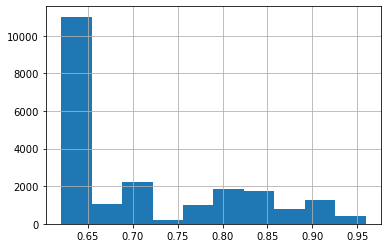

In [607]:
df_housing_wgrade['GraduationRate'].hist()

In [608]:
df_not_null = df_housing_wgrade[df_housing_wgrade['GraduationRate'].notnull()]

In [609]:
df_not_null

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,GraduationRate
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0.672468
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0.646518
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0.720083
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0.646518
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0.806433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0.646518
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0.644117
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,0.646518
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,Average,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,0.827875


In [610]:
df_not_null['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [611]:
df_nulls = df_housing_wgrade[df_housing_wgrade['GraduationRate'].isna()]

In [612]:
df_nulls['zipcode'].value_counts()

Series([], Name: zipcode, dtype: int64)

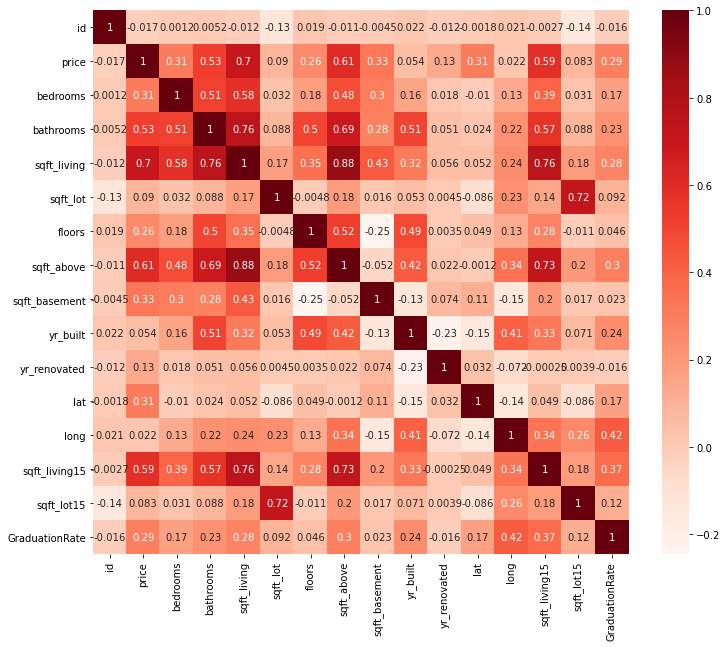

In [613]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_housing_wgrade.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# Analysis of Variables

**This step includes splitting the df_housing_wgrade dataframe into two subsets to evaluate categorical and numeric variables.**

     - Checking that numeric variables in the right format.  
     - Assessing if any categorical variables are ordinal and the respective ranking  
     - Identify any categorical variables which are binary and replace the values with a 0 or 1 value. 

In [614]:
numeric_data = df_housing_wgrade.select_dtypes(include=[np.number])
categorical_data = df_housing_wgrade.select_dtypes(exclude=[np.number])
display(numeric_data)
display(numeric_data.shape[1])
display(categorical_data)
display(categorical_data.shape[1])

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,GraduationRate
0,7129300520,221900.0,3,1.00,1180,5650,1.0,1180,0.0,1955,0.0,47.5112,-122.257,1340,5650,0.672468
1,6414100192,538000.0,3,2.25,2570,7242,2.0,2170,400.0,1951,1991.0,47.7210,-122.319,1690,7639,0.646518
2,5631500400,180000.0,2,1.00,770,10000,1.0,770,0.0,1933,NaN,47.7379,-122.233,2720,8062,0.720083
3,2487200875,604000.0,4,3.00,1960,5000,1.0,1050,910.0,1965,0.0,47.5208,-122.393,1360,5000,0.646518
4,1954400510,510000.0,3,2.00,1680,8080,1.0,1680,0.0,1987,0.0,47.6168,-122.045,1800,7503,0.806433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,1530,0.0,2009,0.0,47.6993,-122.346,1530,1509,0.646518
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,2310,0.0,2014,0.0,47.5107,-122.362,1830,7200,0.644117
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,1020,0.0,2009,0.0,47.5944,-122.299,1020,2007,0.646518
21595,291310100,400000.0,3,2.50,1600,2388,2.0,1600,0.0,2004,0.0,47.5345,-122.069,1410,1287,0.827875


16

,date,waterfront,view,condition,grade,zipcode
0,10/13/2014,NaN,NONE,Average,7 Average,98178
1,12/9/2014,NO,NONE,Average,7 Average,98125
2,2/25/2015,NO,NONE,Average,6 Low Average,98028
3,12/9/2014,NO,NONE,Very Good,7 Average,98136
4,2/18/2015,NO,NONE,Average,8 Good,98074
...,...,...,...,...,...,...
21592,5/21/2014,NO,NONE,Average,8 Good,98103
21593,2/23/2015,NO,NONE,Average,8 Good,98146
21594,6/23/2014,NO,NONE,Average,7 Average,98144
21595,1/16/2015,NaN,NONE,Average,8 Good,98027


6

### Step 1 - Identify Ordinal Variables and Assess Values of Measurement

In [615]:
print("Conditions:")
print(display(df_housing_wgrade['condition'].value_counts()))
print("Grade:")
print(display(df_housing_wgrade['grade'].value_counts()))
print("View:")
print(display(df_housing_wgrade['view'].value_counts()))
print("Waterfront:")
print(display(df_housing_wgrade['waterfront'].value_counts()))

Conditions:


Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

None
Grade:


7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

None
View:


NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

None
Waterfront:


NO     19075
YES      146
Name: waterfront, dtype: int64

None


#### Step 1a - Group Like Values 

**Note** - The glossary of conditions and grades linked here was used to support the groupings identified below: https://kingcounty.gov/depts/assessor/Reports/area-reports/2014/residential-southwest/~/media/depts/assessor/documents/AreaReports/2014/Residential/ImpPic/052ImpPics.pdf

##### Variable:    "Condition" 
- This variable has 5 values, including two are distinguished in the glossary as:

    1 - **Poor**: Many repairs needed. Showing serious deterioration
    
    2 - **Fair**: Some repairs needed immediately. Much deferred maintenance
    
    
- For the purpose of even classification, and since these two values represent sub-optimal property conditions, I will be grouping Poor and Fair together into **Poor**.  The remaining variables I will leave as they are defined in the glossary.  

In [616]:
# This code consolidates the 'Poor' and 'Fair' conditions
cond = df_housing_wgrade['condition'] == "Fair"
df_housing_wgrade.loc[cond,'condition'] = "Poor"

# Below is a check:
display(df_housing_wgrade['condition'].value_counts())

# Then change the variable to ordinal by using the ranking: 1 - Poor, 2 - Average, 3 - Good, 4 - Very Good

df_housing_wgrade.loc[(df_housing_wgrade['condition'] == "Poor"), 'condition'] = 1
df_housing_wgrade.loc[(df_housing_wgrade['condition'] == "Average"), 'condition'] = 2
df_housing_wgrade.loc[(df_housing_wgrade['condition'] == "Good"), 'condition'] = 3
df_housing_wgrade.loc[(df_housing_wgrade['condition'] == "Very Good"), 'condition'] = 4
display(df_housing_wgrade['condition'].value_counts())

Average      14020
Good          5677
Very Good     1701
Poor           199
Name: condition, dtype: int64

2    14020
3     5677
4     1701
1      199
Name: condition, dtype: int64

In [617]:
df_housing_wgrade['condition'] = df_housing_wgrade['condition'].astype(int)

##### Variable:  "Grade"
This variable has a total of 13 possible values, 11 of which are found in the train dataset.
The glossary groups values 1, 2, 3 into '3'.  I have grouped the remaining values according to the following criteria: 

   **New Grade 1:** Is the quality of the property below code? (Grades 1 - 4)\
   **New Grade 2:** Was the property built using adequate standards and material? (Grades 5 - 6)\
   **New Grade 3:** Is the property about average in construction and design? (Grades 7 - 8)\
   **New Grade 4:** Is the property substantially above average in construction and design? (Grades 9 - 10)\
   **New Grade 5:** Is the property customized with the highest quality, luxury finishes? (Grades 10 - 13)\

In [618]:
# This code changes the "grade" variable to ordinal by using the ranking outlined above

df_housing_wgrade.loc[(df_housing_wgrade['grade'] == "3 Poor"),  'grade'] = 1
df_housing_wgrade.loc[(df_housing_wgrade['grade'] == "4 Low"),'grade'] = 1
df_housing_wgrade.loc[(df_housing_wgrade['grade'] == "5 Fair"),'grade'] = 2
df_housing_wgrade.loc[(df_housing_wgrade['grade'] == "6 Low Average"),'grade'] = 2                  
df_housing_wgrade.loc[(df_housing_wgrade['grade'] == "7 Average"),'grade'] = 3 
df_housing_wgrade.loc[(df_housing_wgrade['grade'] == "8 Good"),'grade'] = 3
df_housing_wgrade.loc[(df_housing_wgrade['grade'] == "9 Better") ,'grade'] = 4
df_housing_wgrade.loc[(df_housing_wgrade['grade'] == "10 Very Good"),'grade'] = 4
df_housing_wgrade.loc[(df_housing_wgrade['grade'] == "11 Excellent"),'grade'] = 5
df_housing_wgrade.loc[(df_housing_wgrade['grade'] == "12 Luxury"),'grade'] = 5
df_housing_wgrade.loc[(df_housing_wgrade['grade'] == "13 Mansion"),'grade'] = 5
df_housing_wgrade['grade'].value_counts()

3    15039
4     3749
2     2280
5      501
1       28
Name: grade, dtype: int64

In [619]:
df_housing_wgrade['grade'] = df_housing_wgrade['grade'].astype(int)
df_housing_wgrade.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21597 non-null  int64  
 1   date            21597 non-null  object 
 2   price           21597 non-null  float64
 3   bedrooms        21597 non-null  int64  
 4   bathrooms       21597 non-null  float64
 5   sqft_living     21597 non-null  int64  
 6   sqft_lot        21597 non-null  int64  
 7   floors          21597 non-null  float64
 8   waterfront      19221 non-null  object 
 9   view            21534 non-null  object 
 10  condition       21597 non-null  int64  
 11  grade           21597 non-null  int64  
 12  sqft_above      21597 non-null  int64  
 13  sqft_basement   21143 non-null  float64
 14  yr_built        21597 non-null  int64  
 15  yr_renovated    17755 non-null  float64
 16  zipcode         21597 non-null  object 
 17  lat             21597 non-null 

In [620]:
# The code below changes the "Waterfront" variable into a binary value.  

#df_housing_wgrade['waterfront'] = df_housing_wgrade['waterfront'].replace(to_replace=['NO', 'YES'],\
#                                                                  value=[0, 1])

#df_housing_wgrade['waterfront'].value_counts()

In [621]:
#df_housing_wgrade['waterfront'] = df_housing_wgrade['waterfront'].apply(int)

# Train Test Split

In [622]:
y = df_housing_wgrade.price
X = df_housing_wgrade[['bedrooms', 'sqft_living', 'yr_built','GraduationRate',\
                       'view','condition','grade','zipcode']]

# Here is the convention for a traditional train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

# Pre-processing

## Training Data
 - Shape
     - 10 columns
     - 17,277 rows
 - Data 
     - Numeric Variables = 4
     - Categorical = 6

In [623]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17277 entries, 6243 to 15795
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bedrooms        17277 non-null  int64  
 1   sqft_living     17277 non-null  int64  
 2   yr_built        17277 non-null  int64  
 3   GraduationRate  17277 non-null  float64
 4   view            17224 non-null  object 
 5   condition       17277 non-null  int64  
 6   grade           17277 non-null  int64  
 7   zipcode         17277 non-null  object 
dtypes: float64(1), int64(5), object(2)
memory usage: 1.2+ MB


In [624]:
X_train['GraduationRate'].mean()

0.7170274965550205

In [625]:
X_test['GraduationRate'].mean()

0.7184154691651149

In [626]:
X_train.describe()

,bedrooms,sqft_living,yr_built,GraduationRate,condition,grade
count,17277.000000,17277.000000,17277.000000,17277.000000,17277.000000,17277.000000
mean,3.374891,2083.498293,1970.965272,0.717027,2.411819,3.111188
std,0.904403,917.551017,29.356210,0.094903,0.647582,0.600484
min,1.000000,370.000000,1900.000000,0.620417,1.000000,1.000000
25%,3.000000,1430.000000,1952.000000,0.646518,2.000000,3.000000
50%,3.000000,1920.000000,1975.000000,0.652100,2.000000,3.000000
75%,4.000000,2550.000000,1997.000000,0.806433,3.000000,3.000000
max,11.000000,13540.000000,2015.000000,0.959300,4.000000,5.000000


In [627]:
X_test.describe()

,bedrooms,sqft_living,yr_built,GraduationRate,condition,grade
count,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000
mean,3.366435,2067.618287,1971.137269,0.718415,2.408565,3.114352
std,1.009211,920.319615,29.454198,0.095909,0.642675,0.617247
min,1.000000,410.000000,1900.000000,0.620417,1.000000,1.000000
25%,3.000000,1410.000000,1951.000000,0.646518,2.000000,3.000000
50%,3.000000,1900.000000,1976.000000,0.652100,2.000000,3.000000
75%,4.000000,2520.000000,1997.000000,0.806433,3.000000,3.000000
max,33.000000,10040.000000,2015.000000,0.959300,4.000000,5.000000


<img src="Data/WA_gradrates.png" style="float: right;" alt="Graduation Rates across Washington - 2014" width="200"/>

In [628]:
X_train_numeric = X_train.select_dtypes(include=[np.number])
X_train_categorical = X_train.select_dtypes(exclude=[np.number])
display(X_train_numeric)
display(X_train_numeric.shape[1])
display(X_train_categorical)
display(X_train_categorical.shape[1])

,bedrooms,sqft_living,yr_built,GraduationRate,condition,grade
6243,4,1440,1972,0.646518,3,3
8986,3,1430,1980,0.638550,3,3
9419,4,3120,2010,0.806433,2,4
10155,4,2060,1974,0.786535,2,3
10436,3,2500,1922,0.646518,4,3
...,...,...,...,...,...,...
11964,3,2230,2004,0.692643,2,3
21575,4,2770,2014,0.672468,2,3
5390,4,1530,1976,0.652100,3,2
860,1,380,1963,0.647584,2,2


6

,view,zipcode
6243,NONE,98144
8986,AVERAGE,98045
9419,NONE,98074
10155,NONE,98034
10436,NONE,98103
...,...,...
11964,NONE,98065
21575,NONE,98178
5390,NONE,98014
860,NONE,98168


2

In [629]:
X_test_numeric = X_test.select_dtypes(include=[np.number])
X_test_categorical = X_test.select_dtypes(exclude=[np.number])
display(X_test_numeric)
display(X_test_numeric.shape[1])
display(X_test_categorical)
display(X_test_categorical.shape[1])

,bedrooms,sqft_living,yr_built,GraduationRate,condition,grade
3686,3,850,1945,0.644117,2,2
10247,3,1510,1940,0.646518,3,2
4037,4,1790,1983,0.638550,2,3
3437,2,1140,1988,0.645687,2,3
19291,3,1500,1947,0.646518,2,3
...,...,...,...,...,...,...
2522,2,1020,1948,0.651025,3,2
11119,3,2050,2002,0.647584,2,3
11973,5,2120,1913,0.959300,2,3
17601,3,1990,1990,0.620417,2,3


6

,view,zipcode
3686,NONE,98146
10247,NONE,98115
4037,NONE,98045
3437,FAIR,98106
19291,NONE,98107
...,...,...
2522,NONE,98002
11119,NONE,98168
11973,NONE,98070
17601,NONE,98023


2

In [630]:
X_train_encoded = pd.get_dummies(X_train[['view','zipcode']], drop_first=True)
print(X_train_encoded)

       view_EXCELLENT  view_FAIR  view_GOOD  view_NONE  zipcode_98002  \
6243                0          0          0          1              0   
8986                0          0          0          0              0   
9419                0          0          0          1              0   
10155               0          0          0          1              0   
10436               0          0          0          1              0   
...               ...        ...        ...        ...            ...   
11964               0          0          0          1              0   
21575               0          0          0          1              0   
5390                0          0          0          1              0   
860                 0          0          0          1              0   
15795               0          0          0          1              0   

       zipcode_98003  zipcode_98004  zipcode_98005  zipcode_98006  \
6243               0              0              0    

In [631]:
X_train.drop(['view','zipcode'],1,inplace = True)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [632]:
X_train = X_train.join(X_train_encoded)

In [633]:
X_test_encoded = pd.get_dummies(X_test[['view','zipcode']], drop_first=True)
print(X_test_encoded)

       view_EXCELLENT  view_FAIR  view_GOOD  view_NONE  zipcode_98002  \
3686                0          0          0          1              0   
10247               0          0          0          1              0   
4037                0          0          0          1              0   
3437                0          1          0          0              0   
19291               0          0          0          1              0   
...               ...        ...        ...        ...            ...   
2522                0          0          0          1              1   
11119               0          0          0          1              0   
11973               0          0          0          1              0   
17601               0          0          0          1              0   
19844               0          0          0          1              0   

       zipcode_98003  zipcode_98004  zipcode_98005  zipcode_98006  \
3686               0              0              0    

In [634]:
X_test.drop(['view','zipcode'],1,inplace = True)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [635]:
X_test = X_test.join(X_test_encoded)

In [636]:
display(X_train)
display(X_test)

,bedrooms,sqft_living,yr_built,GraduationRate,condition,grade,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
6243,4,1440,1972,0.646518,3,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8986,3,1430,1980,0.638550,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9419,4,3120,2010,0.806433,2,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10155,4,2060,1974,0.786535,2,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10436,3,2500,1922,0.646518,4,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,3,2230,2004,0.692643,2,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21575,4,2770,2014,0.672468,2,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5390,4,1530,1976,0.652100,3,2,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
860,1,380,1963,0.647584,2,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


,bedrooms,sqft_living,yr_built,GraduationRate,condition,grade,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
3686,3,850,1945,0.644117,2,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
10247,3,1510,1940,0.646518,3,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4037,4,1790,1983,0.638550,2,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3437,2,1140,1988,0.645687,2,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19291,3,1500,1947,0.646518,2,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2522,2,1020,1948,0.651025,3,2,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11119,3,2050,2002,0.647584,2,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
11973,5,2120,1913,0.959300,2,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17601,3,1990,1990,0.620417,2,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [637]:
#X_train.iloc[:,1:10].isna().sum()

#X_train_noH20 =  X_train.drop(['waterfront'],1)
#X_test_noH20 = X_test.drop(['waterfront'],1)

In [638]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17277 entries, 6243 to 15795
Data columns (total 79 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bedrooms        17277 non-null  int64  
 1   sqft_living     17277 non-null  int64  
 2   yr_built        17277 non-null  int64  
 3   GraduationRate  17277 non-null  float64
 4   condition       17277 non-null  int64  
 5   grade           17277 non-null  int64  
 6   view_EXCELLENT  17277 non-null  uint8  
 7   view_FAIR       17277 non-null  uint8  
 8   view_GOOD       17277 non-null  uint8  
 9   view_NONE       17277 non-null  uint8  
 10  zipcode_98002   17277 non-null  uint8  
 11  zipcode_98003   17277 non-null  uint8  
 12  zipcode_98004   17277 non-null  uint8  
 13  zipcode_98005   17277 non-null  uint8  
 14  zipcode_98006   17277 non-null  uint8  
 15  zipcode_98007   17277 non-null  uint8  
 16  zipcode_98008   17277 non-null  uint8  
 17  zipcode_98010   17277 non-nu

In [639]:
scaler = StandardScaler().fit(X_train_noH20)
X_train_scaled = scaler.transform(X_train_noH20)


TypeError: invalid type promotion

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train_noH20,np.log(y_train))

In [ ]:
lm.score(X_train_noH20, np.log(y_train))
OLS(endog = np.log(y_train), exog = X_train_noH20).fit().summary()

In [ ]:
lm.fit(X_train_noH20[['GraduationRate']], y_train).score(X_train_noH20[['GraduationRate']], y_train)

In [ ]:
lm.coef_,X_train_noH20.columns

In [ ]:
sns.scatterplot(lm.predict(X_train_noH20),y_train)



In [ ]:
np.log(475070872.31630564)

In [ ]:
X_train_noH20
